# Atlas region

In [1]:
from nilearn import datasets
from nilearn import plotting 
from nilearn import image 

/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/nilearn/datasets/atlas.py:288: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


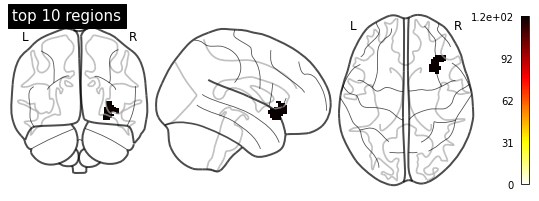

In [6]:
destrieux_atlas = datasets.fetch_atlas_destrieux_2009()

# regions of interest 

best = [123]

dest_img = image.load_img(destrieux_atlas.maps)

dest_affine = dest_img.affine

dest_img_data = dest_img.get_fdata()

dest_img_data_best = dest_img_data.copy()

dest_img_data_best[dest_img_data!=best] = 0

best_img = image.new_img_like(dest_img, dest_img_data_best, affine = dest_affine, copy_header = True)


plotting.plot_glass_brain (best_img, colorbar = True, title = "top 10 regions")


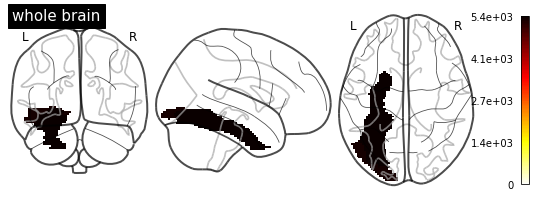

In [9]:

# Load the atlas
aal = datasets.fetch_atlas_aal(version='SPM12')
#my regions of interest indices: 5401, 5301
Fusiform_L = 5401
Occipital_Inf_L = 5301
# Load AAL img
aal_img = image.load_img(aal.maps)
# Get the affine
aal_affine = aal_img.affine
# Get the data of the map
aal_img_data = aal_img.get_fdata()
# For each region, zero-out any region that is not the region of interest
# Start with Fusiform_L
aal_img_data_fusiform_l = aal_img_data.copy()
aal_img_data_fusiform_l[aal_img_data!=Fusiform_L] = 0
# Now with Occipital_Inf_L
aal_img_data_occipital_inf_l = aal_img_data.copy()
aal_img_data_occipital_inf_l[aal_img_data!=Occipital_Inf_L] = 0
# Save these zeroed-out matrices as new img objects

whole_brain = aal_img_data_fusiform_l + aal_img_data_occipital_inf_l

# fusiform_l_img = nilearn.image.new_img_like(aal_img, aal_img_data_fusiform_l, 
#                                              affine=aal_affine, copy_header=True)
# occipital_inf_l_img = nilearn.image.new_img_like(aal_img, aal_img_data_occipital_inf_l, 
#                                                  affine=aal_affine, copy_header=True)

whole_brain_img = image.image.new_img_like(aal_img, whole_brain, affine=aal_affine, copy_header=True)
# Plot the imgs
# nilearn.plotting.plot_glass_brain(fusiform_l_img, colorbar=True, title='Fusiform_L')
# nilearn.plotting.plot_glass_brain(occipital_inf_l_img, colorbar=True, title='Occipital_Inf_L')

plotting.plot_glass_brain(whole_brain_img, colorbar=True, title='whole brain')